# Burnout en empleados corporativos
## Aprendizaje de Máquina - TP FINAL

Este conjunto de datos fue creado como parte de un estudio de investigación destinado a comprender los factores que contribuyen al agotamiento laboral (*burnout*) de los empleados en entornos corporativos. Los datos fueron recolectados mediante encuestas estructuradas y estudios observacionales realizados en empresas con sede en Bengaluru, India. Se enfoca en una variedad de indicadores relacionados con el bienestar laboral y personal, tales como el equilibrio entre la vida laboral y personal, el apoyo del gerente, los patrones de sueño, la carga de trabajo y el reconocimiento. El conjunto de datos ofrece una visión integral de variables comúnmente asociadas con el estrés y el agotamiento de los empleados, brindando información valiosa para el análisis organizacional y el diseño de estrategias de intervención. *(14-04-2018)*

**Fuente del dataset:**  
Shankar, Kunal, 2018, *"Employee Burnout Analysis"*, Harvard Dataverse, [https://doi.org/10.7910/DVN/VG6KQD](https://doi.org/10.7910/DVN/VG6KQD)  


### Carga de datos y visualización rápida

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [70]:
sns.set_palette("pastel")

#### 1. Cargar datos desde un archivo CSV a un df de Pandas

In [71]:
df_csv = pd.read_csv("data/enriched_employee_dataset.csv")

In [72]:
df_csv.head() 

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,16,51,5.2,1,3,4,18,0


In [73]:
df_csv.tail(6) # Mostrar las últimas 6 filas

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.2,0.54,16,56,5.8,1,3,4,17,1
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41,16,58,5.3,1,3,4,5,0
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59,16,50,5.8,2,2,5,3,1
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72,16,50,5.2,1,2,4,15,0
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52,16,59,5.8,2,3,4,8,0
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61,17,53,5.4,2,2,4,17,0


In [74]:
df_csv.shape

(22750, 17)

In [75]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              22750 non-null  object 
 1   Date of Joining          22750 non-null  object 
 2   Gender                   22750 non-null  object 
 3   Company Type             22750 non-null  object 
 4   WFH Setup Available      22750 non-null  object 
 5   Designation              22750 non-null  int64  
 6   Resource Allocation      21369 non-null  float64
 7   Mental Fatigue Score     20633 non-null  float64
 8   Burn Rate                21626 non-null  float64
 9   Years in Company         22750 non-null  int64  
 10  Work Hours per Week      22750 non-null  int64  
 11  Sleep Hours              22750 non-null  float64
 12  Work-Life Balance Score  22750 non-null  int64  
 13  Manager Support Score    22750 non-null  int64  
 14  Deadline Pressure Scor

In [76]:
df_csv.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
count,22750.000000,21369.000000,20633.000000,21626.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.481398,5.728188,0.452005,16.015956,47.364747,6.153965,2.595604,2.874681,3.400132,11.058022,1.819473
std,1.135145,2.047211,1.920839,0.198226,0.125308,7.651106,0.892709,1.402847,1.281129,1.409178,4.907718,1.713508
min,0.000000,1.000000,0.000000,0.000000,16.000000,35.000000,3.400000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000,16.000000,40.000000,5.400000,1.000000,2.000000,2.000000,7.000000,0.000000
50%,2.000000,4.000000,5.900000,0.450000,16.000000,49.000000,6.000000,2.000000,3.000000,4.000000,11.000000,1.000000
75%,3.000000,6.000000,7.100000,0.590000,16.000000,54.000000,6.900000,4.000000,4.000000,5.000000,15.000000,3.000000
max,5.000000,10.000000,10.000000,1.000000,17.000000,59.000000,9.100000,5.000000,5.000000,5.000000,19.000000,5.000000


In [77]:
cols_analizar = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Years in Company', 'Work-Life Balance Score', 'Manager Support Score', 'Deadline Pressure Score', 'Team Size', 'Recognition Frequency']  

for col in cols_analizar:
    print(f"\nValores únicos en {col}: {df_csv[col].unique()}")


Valores únicos en Gender: ['Female' 'Male']

Valores únicos en Company Type: ['Service' 'Product']

Valores únicos en WFH Setup Available: ['No' 'Yes']

Valores únicos en Designation: [2 1 3 0 4 5]

Valores únicos en Resource Allocation: [ 3.  2. nan  1.  7.  4.  6.  5.  8. 10.  9.]

Valores únicos en Years in Company: [16 17]

Valores únicos en Work-Life Balance Score: [3 5 2 1 4]

Valores únicos en Manager Support Score: [3 4 5 2 1]

Valores únicos en Deadline Pressure Score: [1 3 5 4 2]

Valores únicos en Team Size: [16 10 17 13 18  9 14 12  8 19  3  7 15  4 11  6  5]

Valores únicos en Recognition Frequency: [2 5 0 1 4 3]


**Análisis preliminar de las variables del dataset**

| Variable                | Descripción                                                   | Tipo de dato                                             | Acción posible                       |
|-------------------------|---------------------------------------------------------------|----------------------------------------------------------|--------------------------------------|
| Employee ID             | Código de identificación del empleado                         | Categórica - Nominal                                     | Evaluar quitar del dataset           |
| Date of Joining         | Fecha de inicio                                               | Fecha (Categórica/Numérica según el uso)                 | Convertir a formato fecha / Quitar del dataset (mismo motivo que years in company)            | 
| Gender                  | Género (F/M)                                                  | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| Company Type            | Tipo de compañía (Productos/Servicios)                        | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| WFH Setup Available     | Posibilidad de trabajo remoto (*Work From Home*) (Sí/No)      | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| Designation             | Designación - Nivel jerárquico (0 a 5)                        | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Resource Allocation     | Recursos bajo su responsabilidad (1 a 10)        | Categórica - Ordinal (Representación numérica discreta)  | Estrategia para valores nulos  |
| Mental Fatigue Score    | Nivel de fatiga mental (0 a 10)                               | Numérica continua                                        | Estrategia para valores nulos                                     |
| Burn Rate               | Tasa de agotamiento (valores entre 0 y 1)                     | Numérica continua                                        | Definir como output (y)              |
| Years in Company        | Años en la empresa (16 o 17)                                  | Numérica discreta                                        | Evaluar quitar del dataset           |
| Work Hours per Week     | Horas de trabajo por semana (entre 35 y 59)                   | Numérica discreta                                        |                                      |
| Sleep Hours             | Horas de sueño (entre 3.4 y 9.1)                              | Numérica continua                                        |                                      |
| Work-Life Balance Score | Nivel de equilibrio trabajo-vida personal (1 a 5)             | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Manager Support Score   | Nivel de apoyo de la organización (1 a 5)                     | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Deadline Pressure Score | Nivel de presión con deadlines (1 a 5)                        | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Team Size               | Cantidad de personas en el equipo (valores entre 3 y 19)      | Numérica discreta                                        |                                      |
| Recognition Frequency   | Frecuencia de reconocimiento (0 a 5)                          | Categórica - Ordinal (Representación numérica discreta)  |                                      |


### 2. Dividir set en train y test

In [78]:
from sklearn.model_selection import train_test_split
# Separar en features (X) y target (Burn Rate)
X = df_csv.drop(columns=["Burn Rate"])
y = df_csv["Burn Rate"]

# dividir train/test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [79]:
# Reconstruir el dataset de entrenamiento para analisis e imputación
train_df = X_train.copy()
train_df["Burn Rate"] = y_train

test_df = X_test.copy()
test_df["Burn Rate"] = y_test

### 3. Limpieza de datos

#### 3.1 Limpieza de datos: valores nulos

In [80]:
#### 2.1 Revisar datos faltantes y duplicados
print(f"Valores faltantes: {train_df.isnull().sum()}")  # Calcular valores faltantes

Valores faltantes: Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1088
Mental Fatigue Score       1709
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
Burn Rate                   884
dtype: int64


<Axes: >

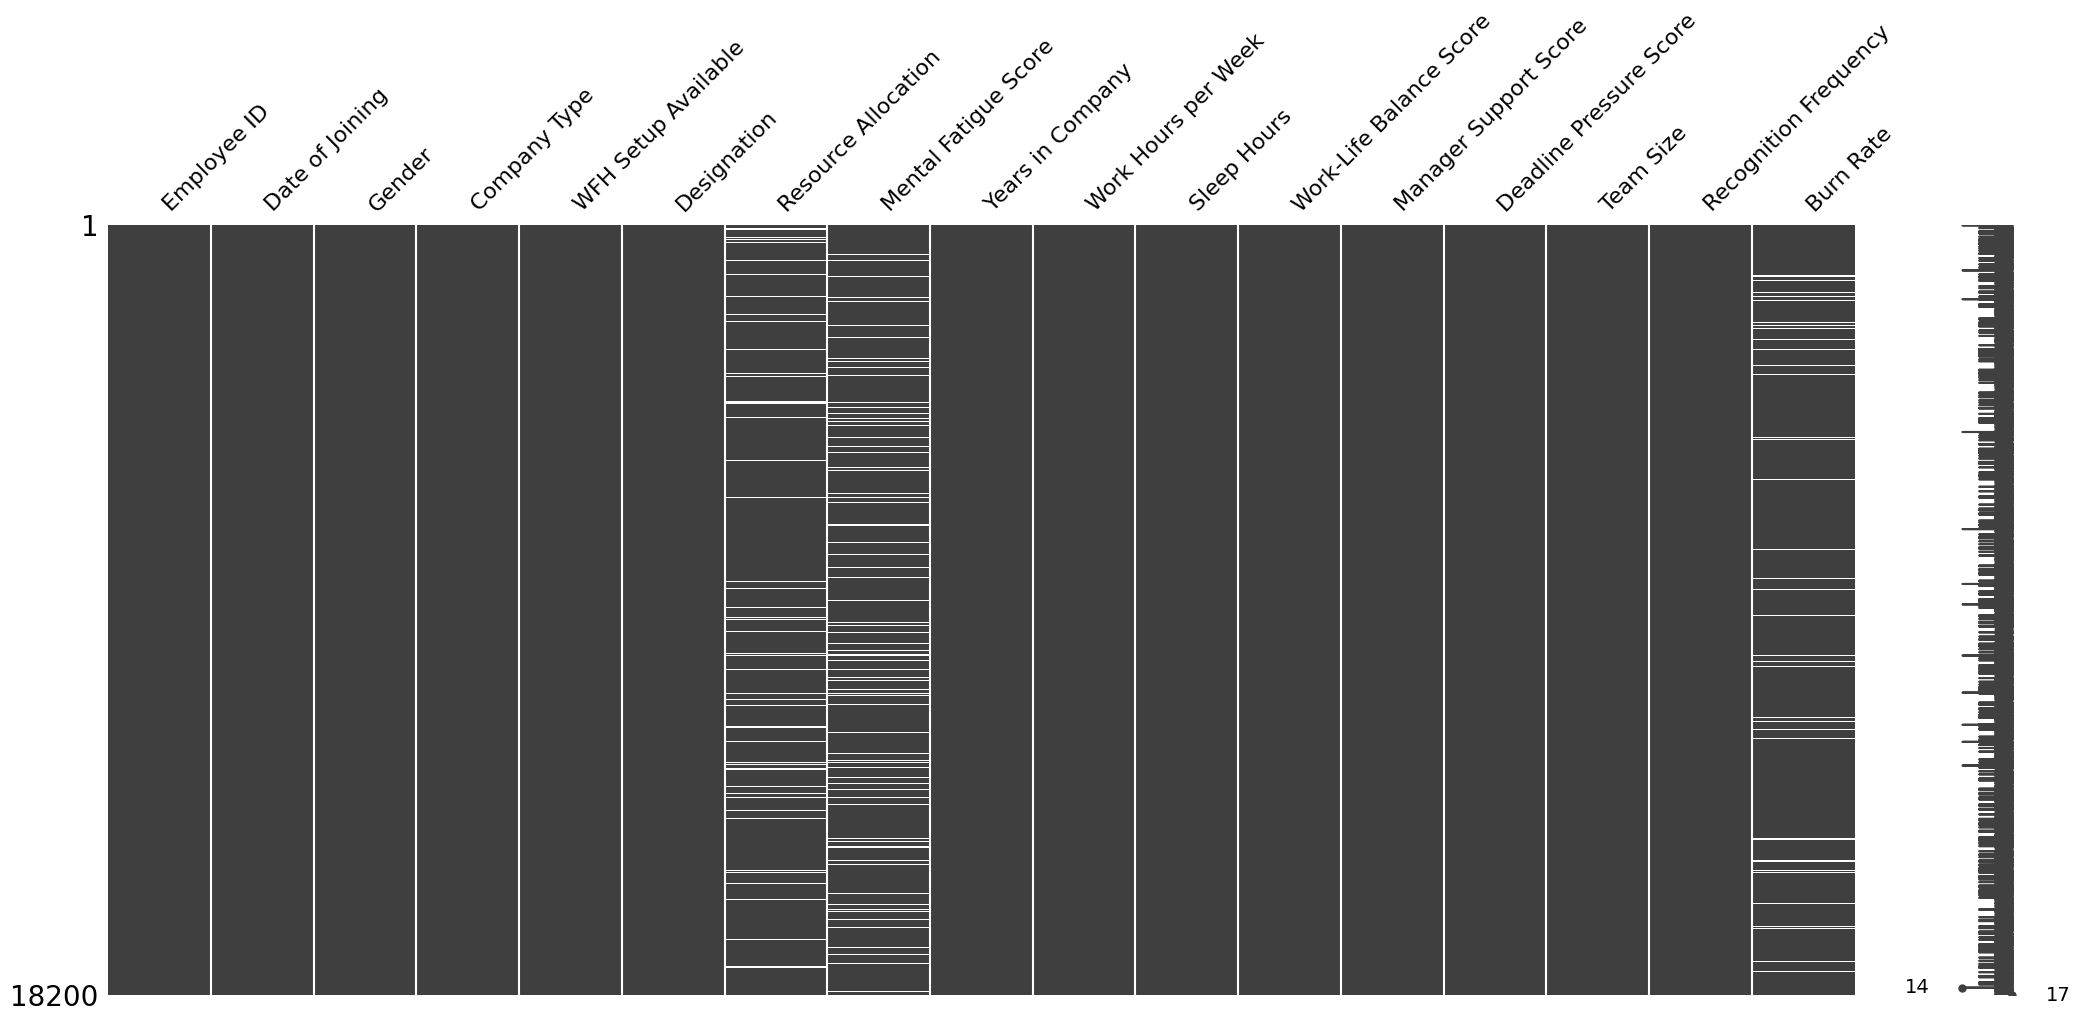

In [81]:
# Visualización de valores faltantes
import missingno as msno
msno.matrix(train_df)

In [82]:
# Ver cuántas filas tienen al menos dos nulos
print("Filas con al menos dos nulos:", train_df.isna().sum(axis=1).gt(1).sum())

Filas con al menos dos nulos: 349


1. **Más de un nulo:** Se eliminan las observaciones que tengan más de un valor nulo, ya que no representan un alto porcentaje del total y podrían ser datos erróneos o haber distintas razones por las que la persona eligió no responder.

In [83]:
# Eliminar filas con dos nulos
train_df_limpio = train_df.dropna(thresh=len(train_df.columns) - 1)

In [84]:
# Comparar antes y después
nulls_before = train_df[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum()
nulls_after = train_df_limpio[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum()

print("Valores nulos antes de limpiar:\n", nulls_before)
print("Valores nulos después de limpiar:\n", nulls_after)


Valores nulos antes de limpiar:
 Resource Allocation     1088
Mental Fatigue Score    1709
Burn Rate                884
dtype: int64
Valores nulos después de limpiar:
 Resource Allocation      865
Mental Fatigue Score    1427
Burn Rate                678
dtype: int64


In [85]:
# Registros restantes en el dataset luego de la limpieza de registros nulos
rows_remaining_pct = round((train_df_limpio.shape[0] / train_df.shape[0]) * 100, 2)
print(f"Porcentaje de registros restantes: {rows_remaining_pct}%")

Porcentaje de registros restantes: 98.08%


2. **Burn Rate:** Al tratarse de la variable de salida, sería incorrecto imputarle algún valor, ya que esto tendría una gran repercusión en los resultados del modelo y podríamos estar introduciendo ruido. Por esta razón, se eliminan las filas con valores nulos en Burn Rate.

In [86]:
# Eliminar filas con valor nulo en Burn Rate
train_df_limpio = train_df_limpio.dropna(subset=['Burn Rate'])

In [87]:
# Comparar antes y después
nulls_final = train_df_limpio[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum()
rows_final_pct = round((train_df_limpio.shape[0] / train_df.shape[0]) * 100, 2)
print("Valores nulos finales:\n", nulls_final)
print(f"Porcentaje de registros restantes después de eliminar nulos en Burn Rate: {rows_final_pct}%")

Valores nulos finales:
 Resource Allocation      865
Mental Fatigue Score    1427
Burn Rate                  0
dtype: int64
Porcentaje de registros restantes después de eliminar nulos en Burn Rate: 94.36%


2. **Resource Allocation**   Se analiza la relación entre Resource Allocation y otras variables, para evaluar cuál sería la mejor estrategia para los valores nulos.

In [88]:
# Se analiza si hay algún valor de las otras variables que se mantenga constante para los nulos de 'Resource Allocation'
nulos_ra = train_df_limpio[train_df_limpio['Resource Allocation'].isnull()]
nulos_ra = nulos_ra.drop(columns=['Employee ID', 'Date of Joining','Years in Company','Resource Allocation'])
nulos_ra.head(15)


,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency,Burn Rate
387,Male,Service,Yes,4,6.9,53,5.8,2,2,4,14,1,0.69
4985,Female,Service,Yes,1,4.6,37,7.0,3,4,2,4,5,0.30
18617,Male,Service,No,4,9.3,56,5.9,2,1,5,16,0,0.83
5910,Female,Service,No,5,8.9,54,5.4,1,1,4,6,1,0.82
22168,Female,Service,No,1,2.5,42,7.1,4,4,2,9,2,0.18
5711,Male,Service,No,2,2.6,41,6.8,3,4,3,4,2,0.18
553,Female,Product,Yes,1,4.2,38,6.7,3,5,1,7,3,0.33
21647,Female,Service,Yes,1,4.0,43,6.4,3,3,3,17,2,0.22
7700,Male,Product,No,2,7.6,54,6.1,1,3,4,19,1,0.65
1335,Female,Service,Yes,2,4.5,40,7.2,4,3,1,12,5,0.21


3. **Mental Fatigue Score:** Se analiza la relación entre Mental Fatigue Score y otras variables, para evaluar cuál sería la mejor estrategia para los valores nulos.

In [89]:
nulos_mfs = train_df_limpio[train_df_limpio['Mental Fatigue Score'].isnull()]
nulos_mfs = nulos_mfs.drop(columns=['Employee ID', 'Date of Joining','Years in Company','Mental Fatigue Score'])
nulos_mfs.head(15)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency,Burn Rate
6020,Male,Service,Yes,2,4.0,51,6.2,1,3,5,18,0,0.49
7033,Female,Product,Yes,2,5.0,58,5.6,1,3,4,11,1,0.44
3335,Female,Service,Yes,1,3.0,40,7.5,4,3,3,19,4,0.36
19716,Female,Service,Yes,0,1.0,44,7.2,4,5,2,18,2,0.14
6626,Female,Service,Yes,2,4.0,58,5.2,1,1,4,3,0,0.46
2856,Male,Service,No,0,2.0,39,7.0,4,4,1,6,3,0.14
5244,Female,Service,Yes,2,5.0,48,5.2,2,2,4,16,1,0.75
5170,Female,Service,Yes,3,7.0,53,5.2,1,1,5,11,1,0.63
5561,Male,Service,Yes,0,1.0,39,7.7,4,4,1,16,4,0.00
15189,Male,Service,No,4,6.0,51,5.3,1,2,4,11,1,0.61


**Análisis de histogramas de Resource Allocation y Mental Fatigue Score:** Se evalúa la distribución de los datos para 'Resource Allocation' y 'Mental Fatigue Score' para evaluar si se pueden imputar. 
- Mental Fatigue Score: se observa una distribución con un pico, por lo que en una primera instancia se propone imputar con una constante estadística (en este caso la mediana, en línea punteada azul). 
- Resource Allocation: se evalúa la correlación con otras variables para evaluar otras estrategias de imputación.

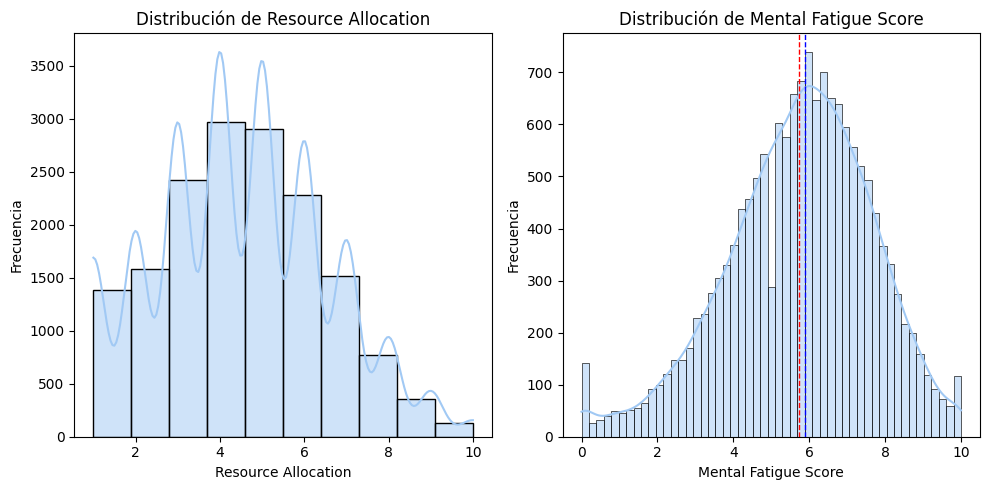

In [90]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_df_limpio['Resource Allocation'], bins=10, kde=True)
plt.title('Distribución de Resource Allocation')
plt.xlabel('Resource Allocation')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(train_df_limpio['Mental Fatigue Score'], bins='auto', kde=True)
plt.axvline(train_df_limpio['Mental Fatigue Score'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(train_df_limpio['Mental Fatigue Score'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución de Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


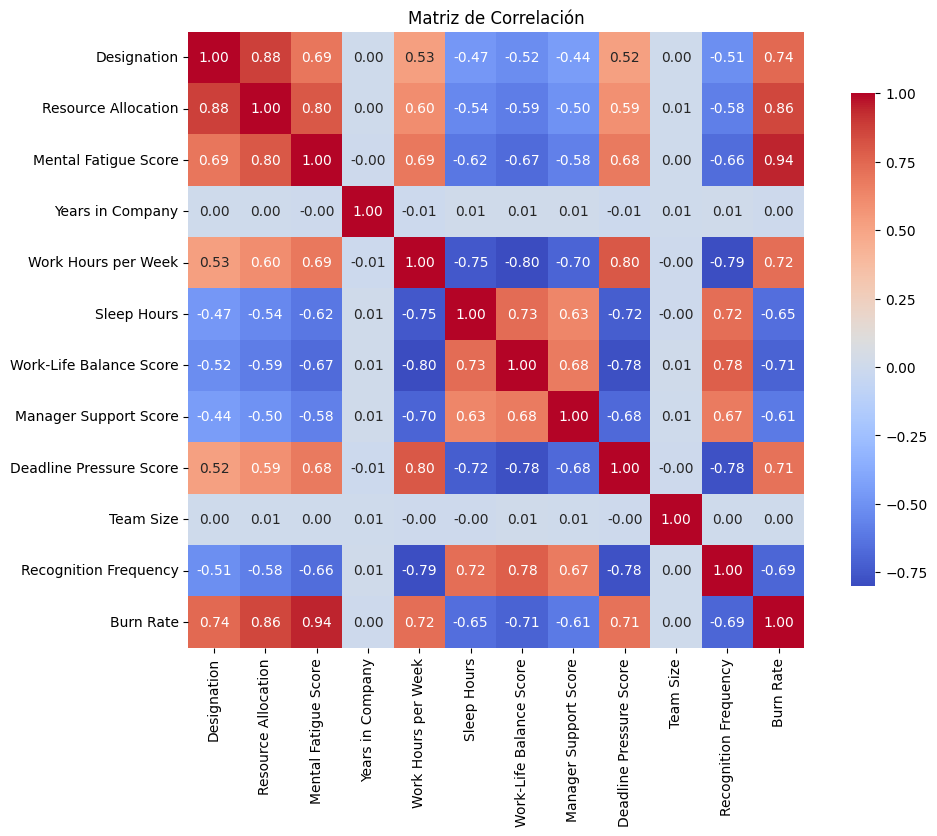

In [91]:
# Evaluar correlación entre 'Resource Allocation' y 'Mental Fatigue Score' y otras variables
# Obtener matriz de correlación
correlation_matrix = train_df_limpio.corr(numeric_only=True)
# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

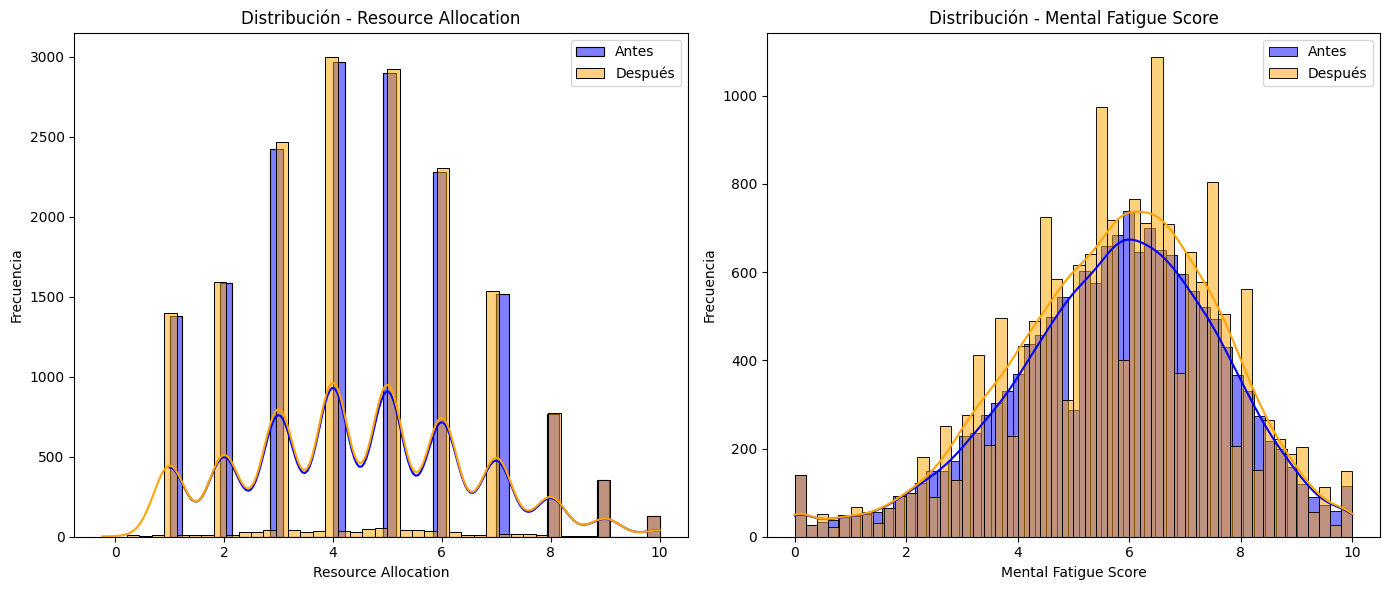

In [92]:
# Imputar datos faltantes en 'Resource Allocation' y 'Mental Fatigue Score' usando MICE (Multiple Imputation by Chained Equations)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

ra_antes = train_df_limpio["Resource Allocation"].copy()
mfs_antes = train_df_limpio["Mental Fatigue Score"].copy()

# 8. Variables para imputar (excluyendo el target)
variables_para_imputar = [
    'Designation', 'Resource Allocation', 'Mental Fatigue Score',
    'Work Hours per Week', 'Sleep Hours', 'Work-Life Balance Score',
    'Manager Support Score', 'Deadline Pressure Score', 'Team Size',
    'Recognition Frequency'
]

# 9. Imputación con MICE - SOLO se ajusta con train
train_df_imputar = train_df_limpio.copy()
imputer = IterativeImputer(max_iter=10, random_state=42)
train_imputed_array = imputer.fit_transform(train_df_imputar[variables_para_imputar])
train_df_imputar[variables_para_imputar] = pd.DataFrame(
    train_imputed_array, columns=variables_para_imputar, index=train_df_imputar.index
)

# 10. Aplicar el mismo imputador al set de test
test_df_imputar = test_df.copy()
test_imputed_array = imputer.transform(test_df_imputar[variables_para_imputar])
test_df_imputar[variables_para_imputar] = pd.DataFrame(
    test_imputed_array, columns=variables_para_imputar, index=test_df_imputar.index
)

# 11. Gráficas pre y post imputación
plt.figure(figsize=(14, 6))

# a) Resource Allocation
plt.subplot(1, 2, 1)
sns.histplot(ra_antes.dropna(), color='blue', label='Antes', kde=True)
sns.histplot(train_df_imputar['Resource Allocation'], color='orange', label='Después', kde=True)
plt.title("Distribución - Resource Allocation")
plt.xlabel("Resource Allocation")
plt.ylabel("Frecuencia")
plt.legend()

# b) Mental Fatigue Score
plt.subplot(1, 2, 2)
sns.histplot(mfs_antes.dropna(), color='blue', label='Antes', kde=True)
sns.histplot(train_df_imputar['Mental Fatigue Score'], color='orange', label='Después', kde=True)
plt.title("Distribución - Mental Fatigue Score")
plt.xlabel("Mental Fatigue Score")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()

Se observa que al imputar utilizando regresión lineal, la gráfica conserva su estructura original y la curva sigue la misma distribución que antes de la imputación. Esto sugiere que el método de imputación elegido es adecuado, ya que no introduce ningún sesgo significativo.

In [93]:
# Verificación de nulos después de la imputación
print("🔍 Valores nulos después de imputación con MICE:")
print(train_df_imputar.isnull().sum())

🔍 Valores nulos después de imputación con MICE:
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Years in Company           0
Work Hours per Week        0
Sleep Hours                0
Work-Life Balance Score    0
Manager Support Score      0
Deadline Pressure Score    0
Team Size                  0
Recognition Frequency      0
Burn Rate                  0
dtype: int64


<Axes: >

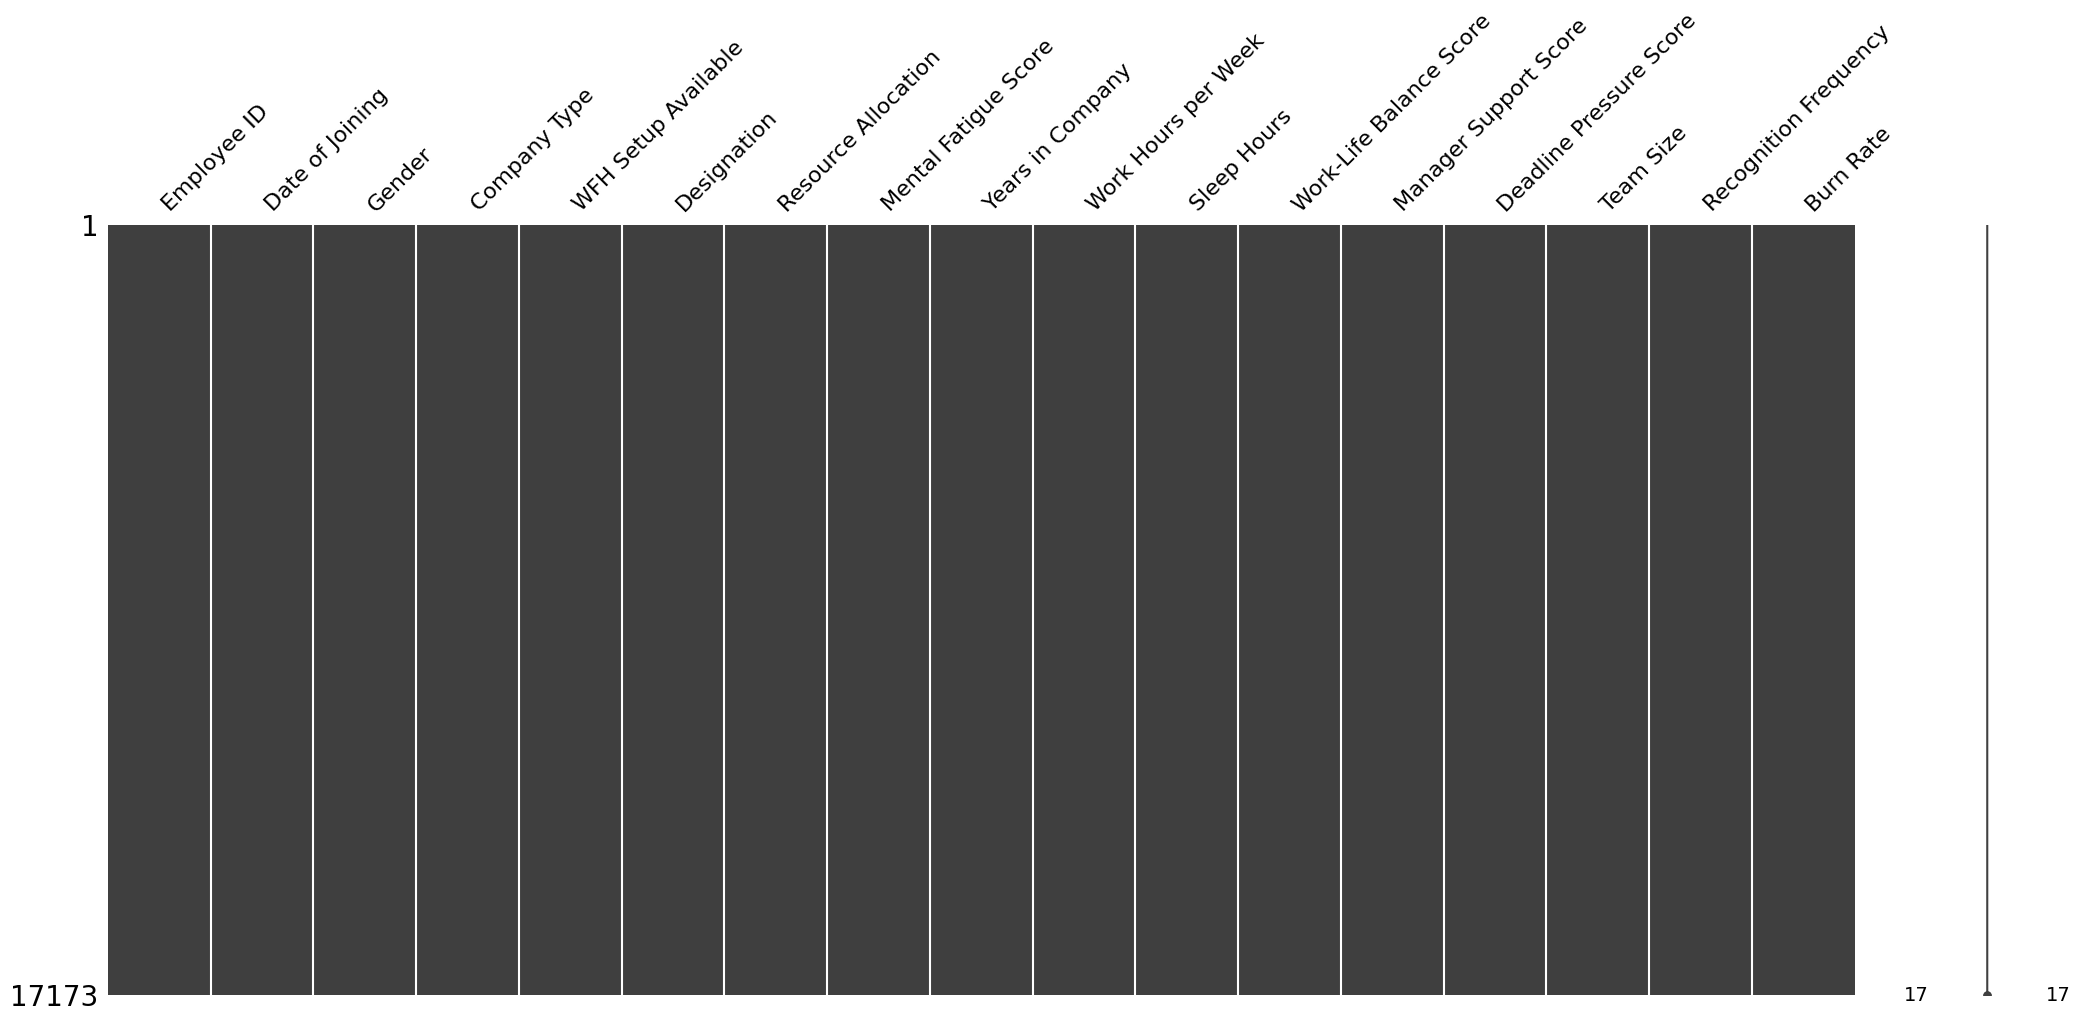

In [94]:
msno.matrix(train_df_imputar)

#### 3.2 Limpieza de datos: valores duplicados

In [95]:
print("Cantidad de datos duplicados:", train_df_imputar.duplicated().sum())

Cantidad de datos duplicados: 0


#### 3.3 Limpieza de datos: Análisis de outliers y variables numéricas

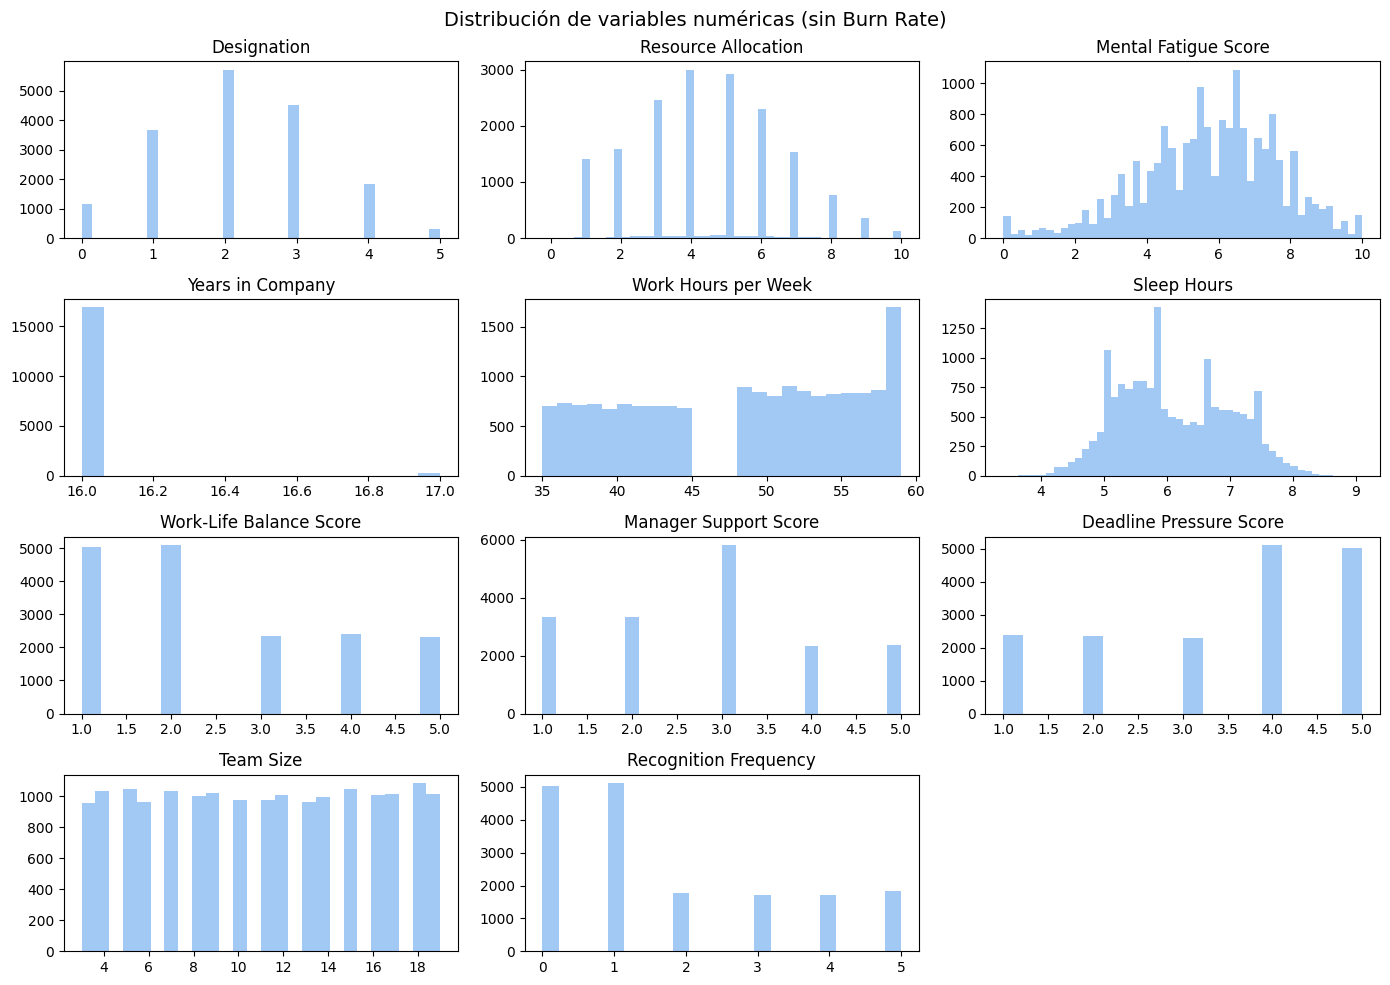

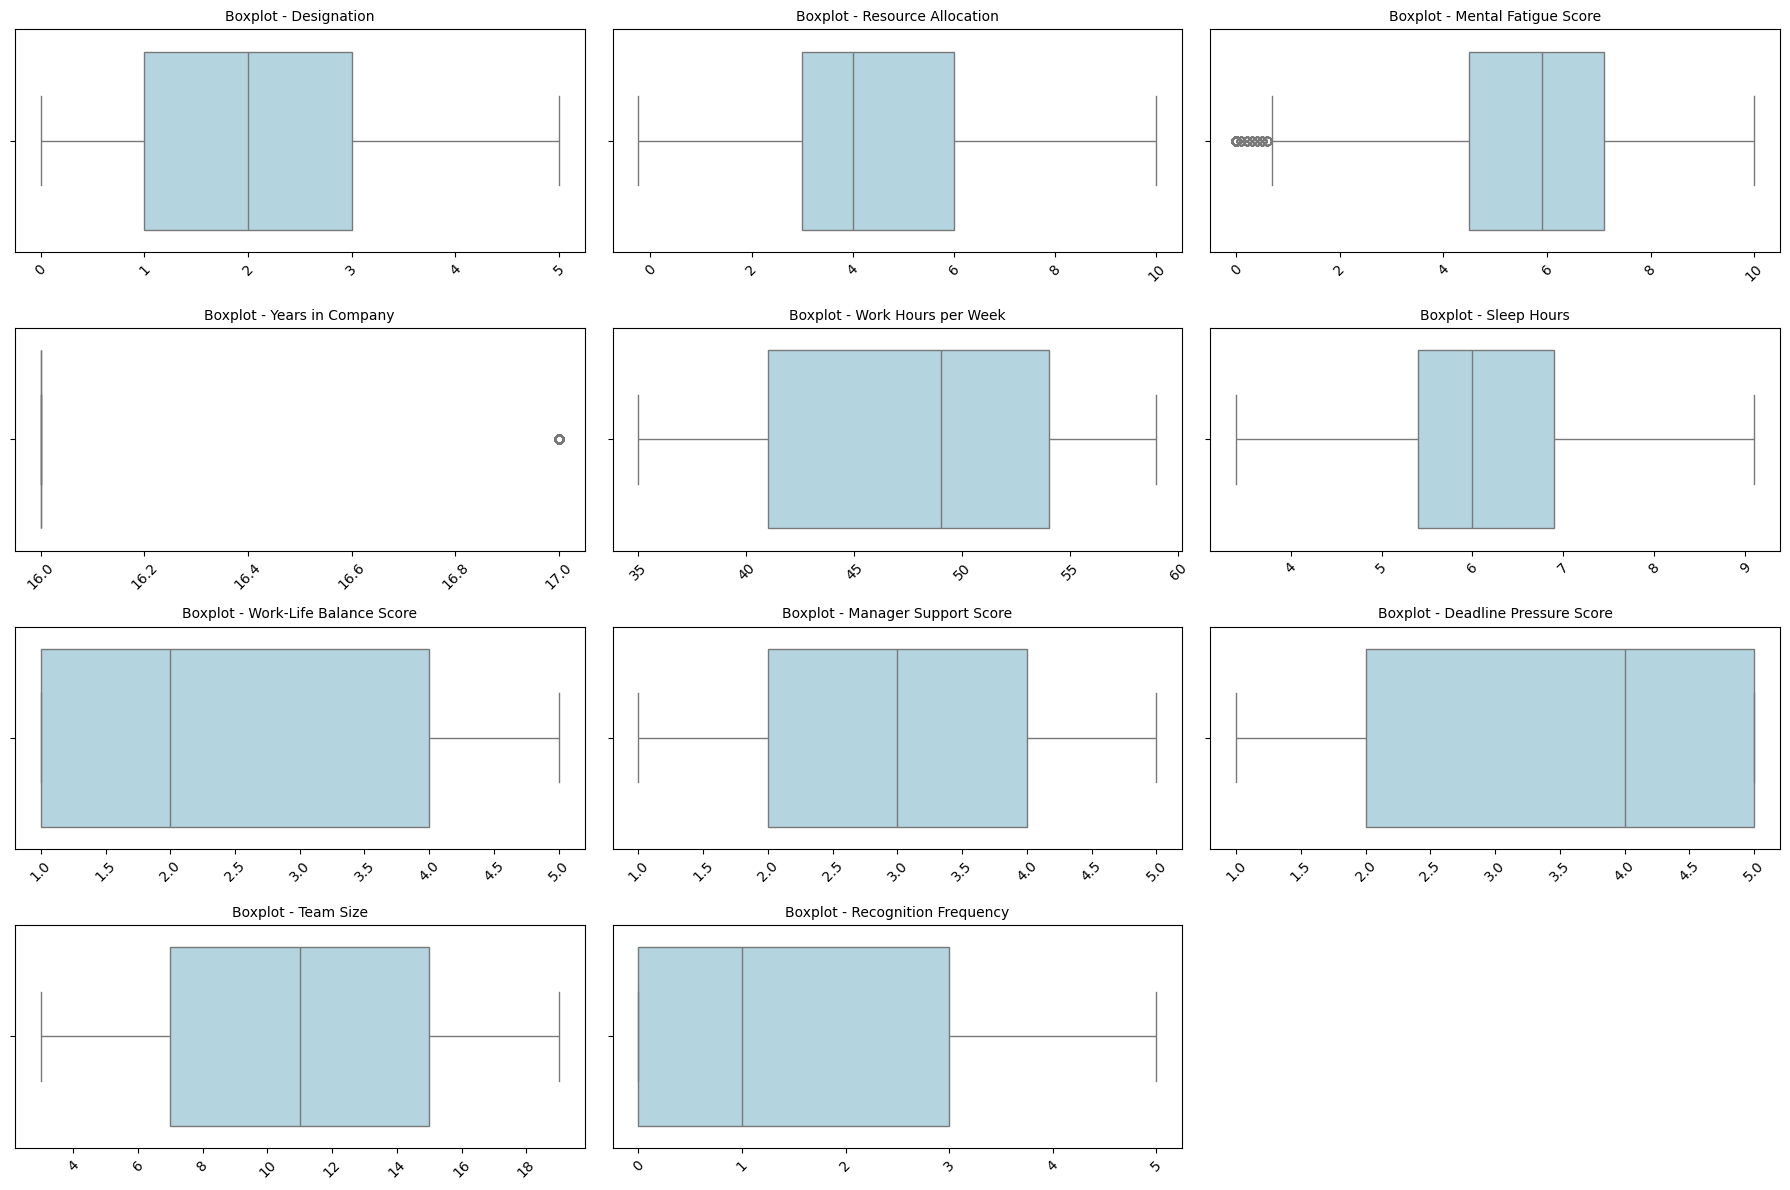

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 1. Seleccionar solo columnas numéricas (excepto la target 'Burn Rate')
numeric_columns = train_df_imputar.select_dtypes(include='number').drop(columns=['Burn Rate']).columns

# 2. Histograma por variable
train_df_imputar[numeric_columns].hist(bins='auto', figsize=(14, 10), grid=False)
plt.suptitle("Distribución de variables numéricas (sin Burn Rate)", fontsize=14)
plt.tight_layout()
plt.show()

# 3. Boxplots para detección visual de outliers
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=train_df_imputar, x=col, ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot - {col}', fontsize=10)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', labelrotation=45)

# Ocultar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [97]:
print("Cantidad de valores < 1 en Mental Fatigue Score:",
      (train_df_imputar['Mental Fatigue Score'] < 1).sum())

Cantidad de valores < 1 en Mental Fatigue Score: 290


Que una persona tenga un nivel de mental fatigue debajo de 1 es inusual, por lo que se lo considera como un error de carga de datos, o simplemente personas que querian omitir esto en la encuesta, es por eso que se decide eliminar estas filas. Además el número total de outliers representa un porcentaje bajo, por lo que es seguro eliminarlos

In [98]:
# Antes de eliminar
print("Tamaño original:", train_df_imputar.shape)

# Filtrar registros con valores sospechosamente bajos
train_df_imputar = train_df_imputar[train_df_imputar['Mental Fatigue Score'] >= 1]

# Después de eliminar
print("Tamaño después de eliminar outliers:", train_df_imputar.shape)

Tamaño original: (17173, 17)
Tamaño después de eliminar outliers: (16883, 17)


### 3. Codificación de variables

#### 3.1 Eliminar columnas irrelevantes
Basándose en el análisis previo de los datos, se observa que la columna "Date of Joining" siempre indica el mismo año, 2008, mientras que "Years in Company" varía únicamente entre 16 y 17 años. Además, el 98,4 % de las filas en "Years in Company" corresponden a 16 años, lo que indica una baja variabilidad en estos registros. Por lo tanto, ambas columnas no aportan información significativa para el análisis y se consideran redundantes, por lo que se decide eliminarlas del conjunto de datos. 

Por otro lado, la columna "Employee ID" funciona únicamente como identificador de cada empleado y no proporciona datos relevantes para los análisis, por lo que también se opta por eliminarla.

In [99]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#  Eliminar columnas irrelevantes
df_train = train_df_imputar.drop(columns=['Employee ID', 'Date of Joining', 'Years in Company'])
df_test = test_df_imputar.drop(columns=['Employee ID', 'Date of Joining', 'Years in Company'])

#### 3.2 Codificar variable Objetivo o Target Burnout

Codificar la variable objetivo Burnout
Esto se hace para que el modelo clasifique categorias, y no un número. Es decir, que prediga si el burn rate es low, medium o high, que es mucho más gráfico y explicativo que si el modelo devolviese un número.

In [100]:
# Clasificación de la variable 'Burn Rate'
def clasificar_burn_rate(x):
    if x < 0.33:
        return "Low"
    elif x < 0.66:
        return "Medium"
    else:
        return "High"

# Aplicar clasificación al target
df_train['BurnRate_Class'] = df_train['Burn Rate'].apply(clasificar_burn_rate)
df_test['BurnRate_Class'] = df_test['Burn Rate'].apply(clasificar_burn_rate)

# Codificación de BurnRate_Class con LabelEncoder (para modelos )
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['BurnRate_Class_Encoded'] = le.fit_transform(df_train['BurnRate_Class'])
df_test['BurnRate_Class_Encoded'] = le.transform(df_test['BurnRate_Class'])


In [101]:
# Separar features y target para el modelo
X_train = df_train.drop(columns=['Burn Rate', 'BurnRate_Class', 'BurnRate_Class_Encoded'])
y_train = df_train['BurnRate_Class_Encoded']

X_test = df_test.drop(columns=['Burn Rate', 'BurnRate_Class', 'BurnRate_Class_Encoded'])
y_test = df_test['BurnRate_Class_Encoded']



#### 3.3 Codificar variables categóricas

Como los modelos numéricos no pueden trabajar directamente con variables categoricas como strings, como Male, 
Yes, No, etc. es necesario transformarlas en numéricas y que conserven la información de la categoria, sin introducir sesgos o relaciones incorrectas.
Porque One Hot Encoding? Porque las variables categóricas son nominales, es decir no tienen un orden lógico, y tienen baja cardinalidad (yes/no, Male/Female, Service/Product). Se crea una columna binaria por categoría. 
Se utiliza dropfirst para evitar la colinealidad, es decir, se codifica Gender, solo como Male o female, ya que la otra variable es implicita, y tienen una correlación total entre ellas.

In [102]:
#  Definir variables categóricas para codificar
categorical_cols = ['Gender', 'Company Type', 'WFH Setup Available']

# Convertir columnas categóricas a tipo 'category'
for col in categorical_cols:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')


# Transformador de columnas: OneHotEncoding a categóricas y passthrough al resto
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

In [104]:
#  Codificar los datasets
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Para visualizar cómo quedó la codificación:
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Juntar nombres de columnas finales (OneHot + numéricas)
final_feature_names = list(onehot_feature_names) + numeric_cols

# Crear DataFrame con columnas bien nombradas
df_train_encoded = pd.DataFrame(X_train_encoded, columns=final_feature_names)
df_train_encoded.head()




,Gender_Male,Company Type_Service,WFH Setup Available_Yes,Designation,Resource Allocation,Mental Fatigue Score,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,1.0,1.0,1.0,2.0,4.0,6.021652,51.0,6.2,1.0,3.0,5.0,18.0,0.0
1,1.0,1.0,1.0,2.0,5.0,6.900000,57.0,4.8,2.0,1.0,4.0,15.0,0.0
2,0.0,1.0,0.0,2.0,4.0,6.600000,59.0,5.6,2.0,1.0,5.0,14.0,1.0
3,1.0,1.0,0.0,2.0,6.0,8.600000,59.0,5.6,1.0,3.0,4.0,5.0,1.0
4,0.0,0.0,1.0,1.0,2.0,4.200000,38.0,7.8,4.0,4.0,2.0,12.0,4.0


### 4. Análisis de desbalanceo de clases

Dado que se esta trabajando con un problema de clasificación multiclase, es necesario analizar si las clases están balanceadas, ya que un desbalance significativo, puede llevar a que los modelos favorezcan calses mayoritarias, reduciendo el desempeño.

In [105]:
# Análisis de distribución y entropía de shannon
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def shannon_entropy(y):
    probs = y.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))

def plot_distribution(y, title="Distribución de clases"):
    sns.countplot(x=y, palette="Set2")
    plt.title(title)
    plt.xlabel("Clase")
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()

def class_info(y, title=""):
    print("Proporciones de clases:")
    print(y.value_counts(normalize=True).round(3))
    print("\nEntropía de Shannon:", round(shannon_entropy(y), 3))
    plot_distribution(y, title)


Proporciones de clases:
BurnRate_Class_Encoded
2    0.589
1    0.253
0    0.158
Name: proportion, dtype: float64

Entropía de Shannon: 1.372


C:\Users\fg_ma\AppData\Local\Temp\ipykernel_15060\3029982103.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


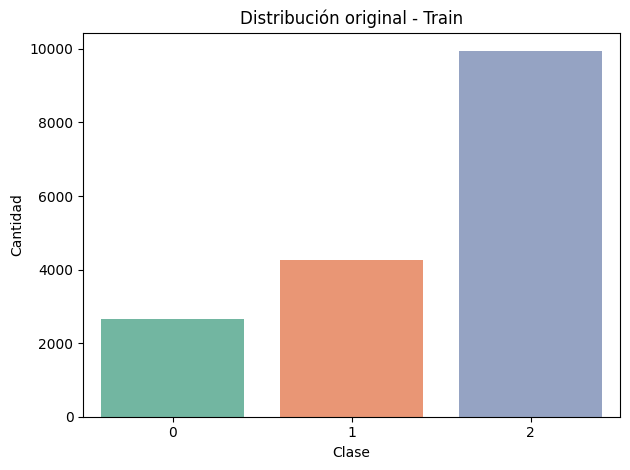

In [106]:
class_info(y_train, "Distribución original - Train")

Se realizó un análisis de distribución de clases sobre la variable target BurnRate_Class, observándose una proporción de aproximadamente 58% para la clase Medium, 27% para Low y 15% para High.

Para cuantificar el grado de desbalance, se utilizó la entropía de Shannon, obteniéndose un valor de 1.377 sobre un máximo teórico de 1.585 (para 3 clases).
Este valor indica que, si bien existe cierto desbalance, no es un desbalance extremo. Por lo que no es estrictamente necesario balancear

### 5. Análisis de correlación entre variables

C:\Users\fg_ma\AppData\Local\Temp\ipykernel_15060\654855488.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\fg_ma\AppData\Local\pypoetry\Cache\virtualenvs\ceia-ml-tpfinal-TBgHYqpN-py3.11\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


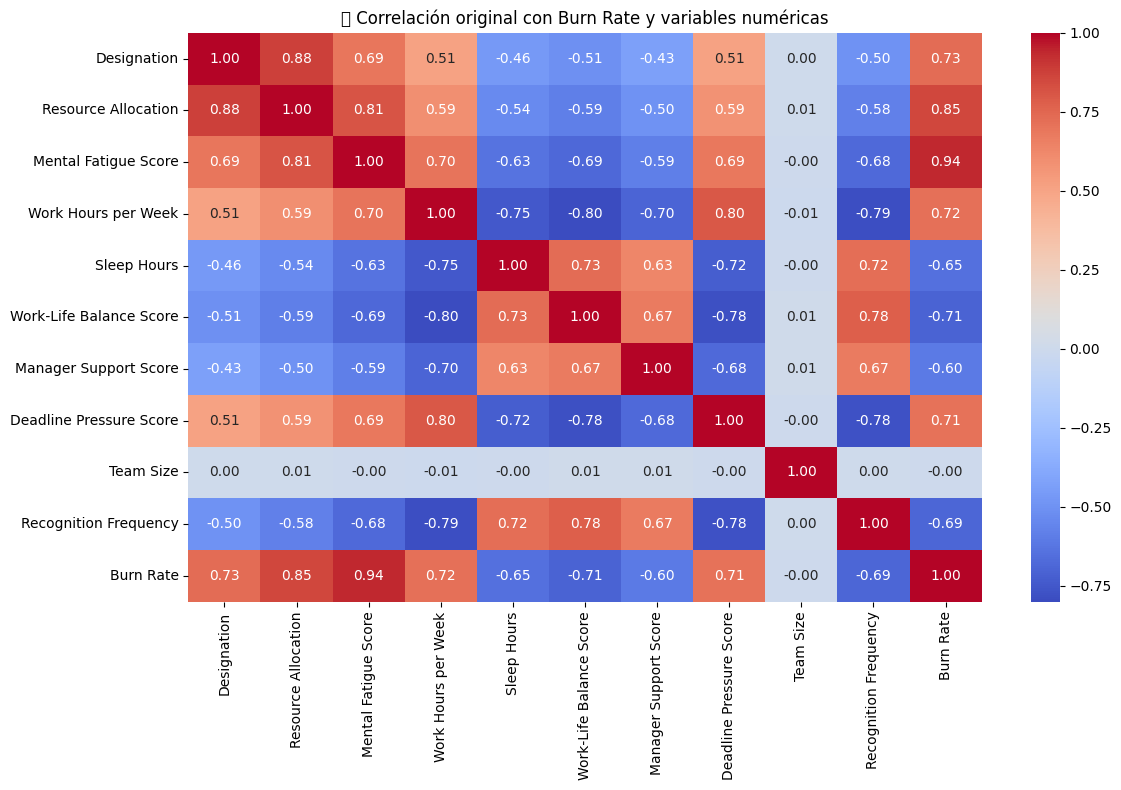

📈 Ranking de correlaciones con Burn Rate:
Burn Rate                  1.000000
Mental Fatigue Score       0.938510
Resource Allocation        0.852555
Designation                0.728093
Work Hours per Week        0.716533
Deadline Pressure Score    0.706390
Team Size                 -0.000624
Manager Support Score     -0.604480
Sleep Hours               -0.649790
Recognition Frequency     -0.693049
Work-Life Balance Score   -0.707002
Name: Burn Rate, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copia del DataFrame para análisis de correlación
df_corr_original = df_train.copy()

if 'BurnRate_Class_Encoded' in df_corr_original.columns:
    df_corr_original = df_corr_original.drop(columns=['BurnRate_Class_Encoded'])

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr_original.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('📊 Correlación original con Burn Rate y variables numéricas')
plt.tight_layout()
plt.show()

# Ranking de correlaciones con Burn Rate
print("📈 Ranking de correlaciones con Burn Rate:")
print(df_corr_original.corr(numeric_only=True)['Burn Rate'].sort_values(ascending=False))


En la matriz de correlación se observan varios patrones relevantes sobre cómo se relacionan las variables con el nivel de agotamiento laboral (Burn Rate) y entre sí:

**Burn Rate tiene alta correlación positiva con:**

- Mental Fatigue Score (0.94)
- Resource Allocation (0.85)
- Designation (0.73)
- Work Hours per Week (0.72)
- Deadline Pressure Score (0.71)

Estas variables están fuertemente asociadas con un mayor agotamiento.

**Burn Rate tiene correlación negativa con:**

- Sleep Hours (-0.65)
- Work-Life Balance Score (-0.71)
- Manager Support Score (-0.61)
- Recognition Frequency (-0.70)

Es decir, más sueño, mejor balance, mayor apoyo y más reconocimiento tienden a reducir el burnout.

*Team Size es la única variable que no muestra correlación significativa con otras variables, por lo que tambien podría ser una variable a eliminar a futuro al momento de modelar alguna solución*

### 6. Conclusiones

¿Existen diferencias significativas en los niveles de agotamiento laboral entre empleados de diferentes tipos de compañías?

*Analizando el gráfico, no se observan diferencias en los niveles de burnout según si el tipo de compañía es de productos o servicios.*

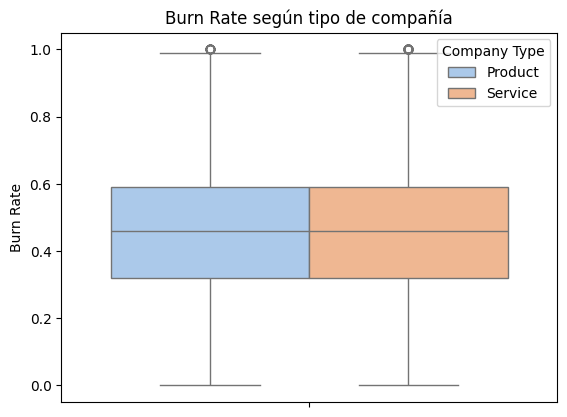

In [111]:
sns.boxplot(data=df_corr_original, y='Burn Rate', hue='Company Type')
plt.title('Burn Rate según tipo de compañía')
plt.show()

¿En qué medida el apoyo percibido de la organización reduce los niveles de agotamiento laboral entre los empleados?

*Se observa que el nivel de agotamiento laboral es mayor para los empleados que perciben un menor apoyo de la organización, y que disminuye para los casos en que se percibe más apoyo. Además, para los casos en que se percibe menor apoyo (nivel 1 y 2) se observa una gran cantidad de outliers con valores altos (mayores a Q3 + 1.5 * IQR). Esto significa que en estos casos se observan tasas de agotamiento laboral muy superiores al resto de los encontrados en nuestra distribución.*

En niveles bajos de apoyo (1-2), el Burn Rate nunca desciende por debajo de 0.4, incluso en empleados con equilibrio trabajo-vida adecuado o bajo carga laboral.

En niveles altos (4-5), el Burn Rate se mantiene por debajo de 0.3 (con un mínimo de 0.16 en el percentil 95).

Algo importante a considerar, es que es una variable estratégicametne controlable dentro de la compañia, a diferencia de factores como las horas de sueño o el equilibrio personal, el apoyo gerencial es un factor modificable mediante políticas internas (ej: capacitación, cultura organizacional).

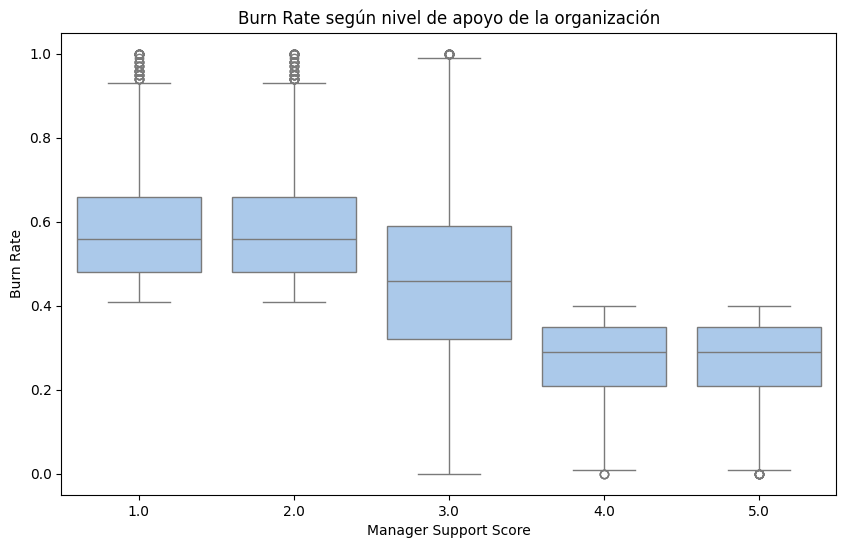

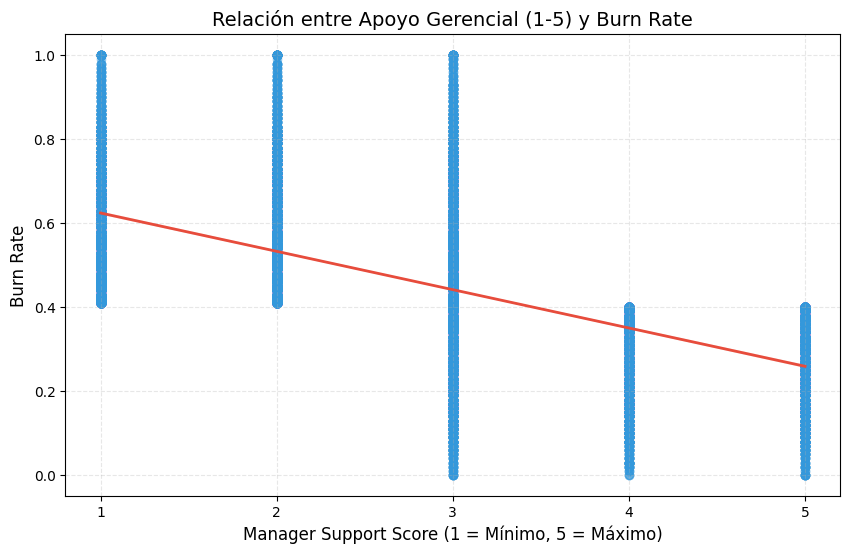

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_corr_original, y='Burn Rate', x='Manager Support Score')
plt.title('Burn Rate según nivel de apoyo de la organización')
plt.xlabel('Manager Support Score')
plt.ylabel('Burn Rate')
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(
    x="Manager Support Score", 
    y="Burn Rate", 
    data=df_corr_original, 
    scatter_kws={"alpha": 0.4, "color": "#3498DB"}, 
    line_kws={"color": "#E74C3C", "lw": 2}, 
    ci=95
)
plt.title("Relación entre Apoyo Gerencial (1-5) y Burn Rate", fontsize=14)
plt.xlabel("Manager Support Score (1 = Mínimo, 5 = Máximo)", fontsize=12)
plt.ylabel("Burn Rate", fontsize=12)
plt.grid(linestyle="--", alpha=0.3)
plt.xticks(range(1, 6))  # Asegurar que el eje X muestre solo valores de 1 a 5
plt.show()


¿Cómo influye el equilibrio entre el trabajo y la vida personal, y la cantidad de horas de descanso en los niveles de agotamiento laboral?

*Se observa que en los casos en que el nivel de equilibrio entre trabajo y vida personal es más bajo, el nivel de agotamiento laboral es mayor, especialmente en los niveles 1 y 2. Además, similar a lo que ocurría en el caso anterior, se observan valores atípicos para el burn rate en los niveles 1 y 2, que están por encima de los valores encontrados en esta distribución. Con respecto a la cantidad de horas de descanso, se observa que las tasas de agotamiento laboral son más bajas cuando las horas de sueño son mayores a 6.5-7 hs. Ambos gráficos se condicen con lo esperado, es decir, que el agotamiento laboral es mayor cuanto peor es el equilibrio entre trabajo y vida laboral y menores son las horas de descanso.*

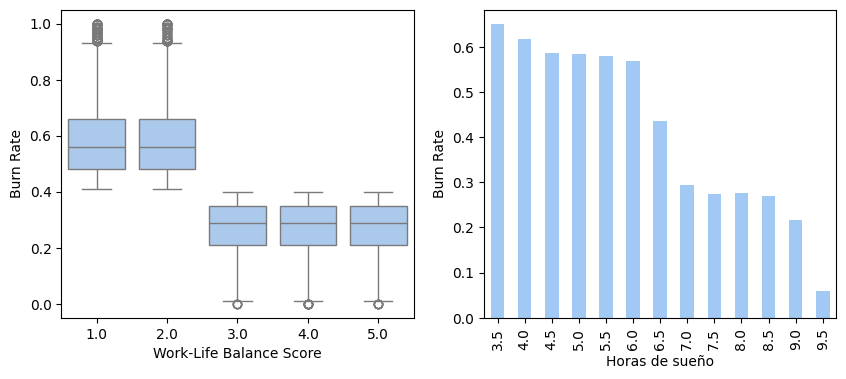

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Work-Life Balance Score
sns.boxplot(data=df_corr_original, y='Burn Rate', x='Work-Life Balance Score', ax=ax[0])
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Burn Rate')

# Horas de sueño - Agrupando los valores cada media hora y redondeando hacia arriba
df_corr_original['Rango_Descanso'] = np.ceil(df_corr_original['Sleep Hours'] * 2) / 2
df_corr_original.groupby('Rango_Descanso')['Burn Rate'].mean().plot(kind='bar', ax=ax[1])
plt.xlabel('Horas de sueño')
plt.ylabel('Burn Rate')

plt.show()

¿Existe un umbral crítico de horas de trabajo o fatiga mental a partir del cual el burnout se incrementa drásticamente?

*El objetivo es detectar si existe un punto de inflexión entre las horas trabajadas por semana y la fatiga mental a partil del cuál el burnout se incrementa drásticamente.*

- *En cuanto a las Horas de trabajo vs. Burnout, se observa un cambio abrupto alrededor de las 46-47 horas semanales. Antes de ese umbral, el aumento del Burn Rate es moderado. A partir de este punto, el burnout sube más rápido y se estabiliza en niveles altos.*

- *Por otra parte, la fatiga mental vs. Burnout muestra una relación claramente no lineal y creciente. A partir de un puntaje de fatiga mental cercano a 6 o 7, el burnout se acelera exponencialmente. Esto indica que incluso diferencias pequeñas en niveles de fatiga alta pueden tener gran impacto en el agotamiento.*

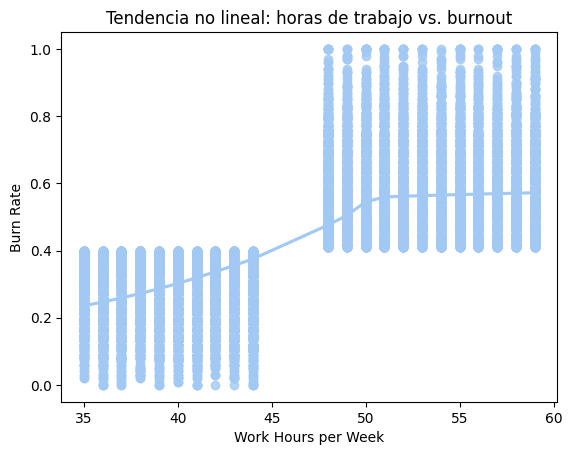

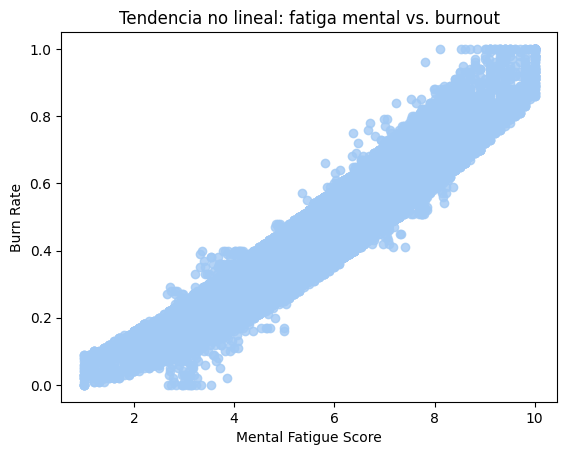

In [116]:
# Relación entre horas de trabajo y burnout
sns.regplot(data=df_corr_original, x='Work Hours per Week', y='Burn Rate', lowess=True)
plt.title('Tendencia no lineal: horas de trabajo vs. burnout')
plt.show()

# Relación entre fatiga mental y burnout
sns.regplot(data=df_corr_original, x='Mental Fatigue Score', y='Burn Rate', lowess=True)
plt.title('Tendencia no lineal: fatiga mental vs. burnout')
plt.show()